In [1]:
from google.colab import files
uploaded = files.upload()


Saving Afficionado Coffee Roasters.xlsx to Afficionado Coffee Roasters.xlsx


In [2]:
import pandas as pd

df = pd.read_excel("Afficionado Coffee Roasters.xlsx")

df.head()


,transaction_id,year,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2025,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2025,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2025,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2025,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2025,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# **Basic data validation**

In [3]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   year              149116 non-null  int64  
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 12.5+ MB


,transaction_id,year,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.0,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2025.0,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.0,0.542509,2.074241,17.930020,2.658723
min,1.000000,2025.0,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2025.0,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2025.0,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2025.0,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2025.0,8.000000,8.000000,87.000000,45.000000


Revenue Computation (Required)

In [4]:
df["revenue"] = df["transaction_qty"] * df["unit_price"]

df.head()


,transaction_id,year,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,revenue
0,1,2025,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2025,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2025,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2025,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2025,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [5]:
(df["transaction_qty"] <= 0).sum()
(df["unit_price"] <= 0).sum()


np.int64(0)

# **Product Popularity Analyst**

In [6]:
product_units = df.groupby("product_detail")["transaction_qty"].sum().sort_values(ascending=False)

product_units.head(10)


,transaction_qty
product_detail,
Earl Grey Rg,4708
Dark chocolate Lg,4668
Morning Sunrise Chai Rg,4643
Latte,4602
Peppermint Rg,4564
Columbian Medium Roast Rg,4547
Traditional Blend Chai Rg,4512
Latte Rg,4497
Our Old Time Diner Blend Sm,4484


# **Least-selling products**

In [7]:
product_units.tail(10)


,transaction_qty
product_detail,
Traditional Blend Chai,153
Lemon Grass,152
Primo Espresso Roast,150
Chili Mayan,148
Columbian Medium Roast,148
Jamacian Coffee River,146
Earl Grey,142
Guatemalan Sustainably Grown,134
Spicy Eye Opener Chai,122


**Revenue Aggregation
Revenue by product**

In [8]:
product_revenue = df.groupby("product_detail")["revenue"].sum().sort_values(ascending=False)

product_revenue.head(10)


,revenue
product_detail,
Sustainably Grown Organic Lg,21151.75
Dark chocolate Lg,21006.00
Latte Rg,19112.25
Cappuccino Lg,17641.75
Morning Sunrise Chai Lg,17384.00
Latte,17257.50
Jamaican Coffee River Lg,16481.25
Sustainably Grown Organic Rg,16233.75
Cappuccino,15997.50


Revenue by product type

In [10]:
df.groupby("product_type")["revenue"].sum().sort_values(ascending=False)


,revenue
product_type,
Barista Espresso,91406.20
Brewed Chai tea,77081.95
Hot chocolate,72416.00
Gourmet brewed coffee,70034.60
Brewed Black tea,47932.00
Brewed herbal tea,47539.50
Premium brewed coffee,38781.15
Organic brewed coffee,37746.50
Scone,36866.12


Revenue by category

In [11]:
df.groupby("product_category")["revenue"].sum().sort_values(ascending=False)


,revenue
product_category,
Coffee,269952.45
Tea,196405.95
Bakery,82315.64
Drinking Chocolate,72416.00
Coffee beans,40085.25
Branded,13607.00
Loose Tea,11213.60
Flavours,8408.80
Packaged Chocolate,4407.64


# **Revenue Contribution %**

In [12]:
revenue_share = (product_revenue / product_revenue.sum()) * 100
revenue_share.head(10)


,revenue
product_detail,
Sustainably Grown Organic Lg,3.026814
Dark chocolate Lg,3.005957
Latte Rg,2.734962
Cappuccino Lg,2.524533
Morning Sunrise Chai Lg,2.487649
Latte,2.469547
Jamaican Coffee River Lg,2.358466
Sustainably Grown Organic Rg,2.323049
Cappuccino,2.289241


# **Volume vs Revenue Comparison**

In [13]:
volume_rank = product_units.rank(ascending=False)
revenue_rank = product_revenue.rank(ascending=False)

comparison = pd.DataFrame({
    "Units Sold": product_units,
    "Revenue": product_revenue,
    "Volume Rank": volume_rank,
    "Revenue Rank": revenue_rank
})

comparison.head(10)


,Units Sold,Revenue,Volume Rank,Revenue Rank
product_detail,,,,
Almond Croissant,1911,7168.13,54.0,47.0
Brazilian - Organic,214,3852.00,63.0,58.0
Brazilian Lg,4317,15109.50,22.0,10.0
Brazilian Rg,4385,13155.00,17.0,15.0
Brazilian Sm,4310,9482.00,23.0,40.0
Cappuccino,4266,15997.50,25.0,9.0
Cappuccino Lg,4151,17641.75,35.0,4.0
Carmel syrup,2576,2060.80,45.0,67.0
Chili Mayan,148,1972.84,74.5,68.0


# **Category & Product-Type Performance**

Category revenue share

In [14]:
category_rev = df.groupby("product_category")["revenue"].sum()

category_share = (category_rev / category_rev.sum()) * 100
category_share


,revenue
product_category,
Bakery,11.779363
Branded,1.947161
Coffee,38.630178
Coffee beans,5.736197
Drinking Chocolate,10.362725
Flavours,1.203299
Loose Tea,1.604665
Packaged Chocolate,0.630733
Tea,28.105679


Product-type contribution inside category

In [15]:
df.groupby(["product_category", "product_type"])["revenue"].sum()


product_category    product_type         
Bakery              Biscotti                 19793.53
                    Pastry                   25655.99
                    Scone                    36866.12
Branded             Clothing                  6163.00
                    Housewares                7444.00
Coffee              Barista Espresso         91406.20
                    Drip coffee              31984.00
                    Gourmet brewed coffee    70034.60
                    Organic brewed coffee    37746.50
                    Premium brewed coffee    38781.15
Coffee beans        Espresso Beans            5560.25
                    Gourmet Beans             6798.00
                    Green beans               1340.00
                    House blend Beans         3294.00
                    Organic Beans             8509.50
                    Premium Beans            14583.50
Drinking Chocolate  Hot chocolate            72416.00
Flavours            Regular syrup             6084.80
                    Sugar free syrup          2324.00
Loose Tea           Black tea                 2711.85
                    Chai tea                  4301.25
                    Green tea                 1470.75
                    Herbal tea                2729.75
Packaged Chocolate  Drinking Chocolate        2728.04
                    Organic Chocolate         1679.60
Tea                 Brewed Black tea         47932.00
                    Brewed Chai tea          77081.95
                    Brewed Green tea         23852.50
                    Brewed herbal tea        47539.50
Name: revenue, dtype: float64



>#**Revenue Concentration (Pareto Analysis)**



Sort product revenue

In [16]:
product_rev_sorted = product_revenue.sort_values(ascending=False)


Cumulative revenue contribution

In [17]:
cumulative = product_rev_sorted.cumsum() / product_rev_sorted.sum()

cumulative.head(20)


,revenue
product_detail,
Sustainably Grown Organic Lg,0.030268
Dark chocolate Lg,0.060328
Latte Rg,0.087677
Cappuccino Lg,0.112923
Morning Sunrise Chai Lg,0.137799
Latte,0.162495
Jamaican Coffee River Lg,0.186079
Sustainably Grown Organic Rg,0.209310
Cappuccino,0.232202


Count products generating 80% revenue

In [18]:
(cumulative <= 0.8).sum()


np.int64(42)

Revenue anchors (top products)

In [19]:
product_rev_sorted.head(5)


,revenue
product_detail,
Sustainably Grown Organic Lg,21151.75
Dark chocolate Lg,21006.00
Latte Rg,19112.25
Cappuccino Lg,17641.75
Morning Sunrise Chai Lg,17384.00


**Long-tail productst**

In [20]:
product_rev_sorted.tail(10)


,revenue
product_detail,
Morning Sunrise Chai,1596.00
Serenity Green Tea,1470.75
English Breakfast,1440.95
Traditional Blend Chai,1369.35
Peppermint,1369.35
Lemon Grass,1360.40
Guatemalan Sustainably Grown,1340.00
Spicy Eye Opener Chai,1335.90
Earl Grey,1270.90


# **Charts**

---



Import plotting library

In [21]:
import matplotlib.pyplot as plt


Revenue by Category

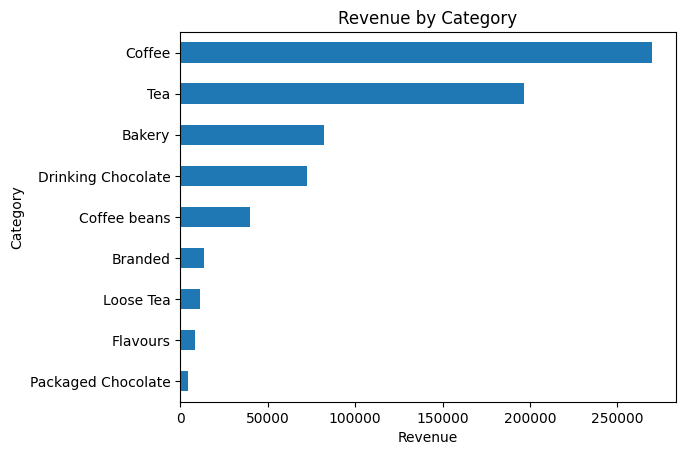

In [22]:
category_rev.sort_values().plot(kind="barh")
plt.title("Revenue by Category")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.show()


# **Top 10 Products by Revenue**

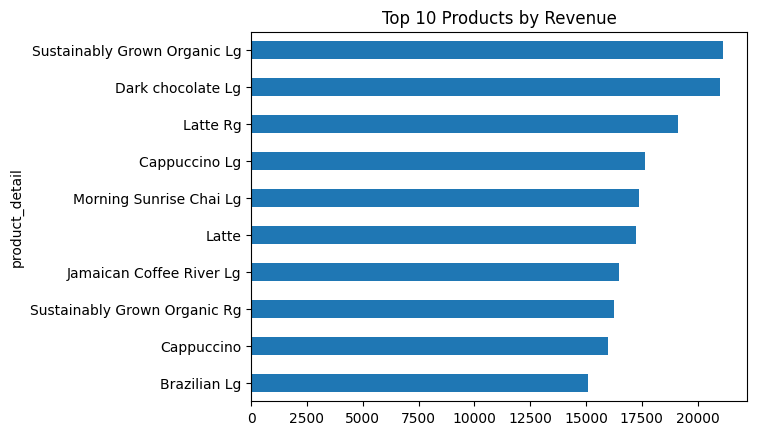

In [23]:
product_revenue.head(10).sort_values().plot(kind="barh")
plt.title("Top 10 Products by Revenue")
plt.show()


# **Store Performance**

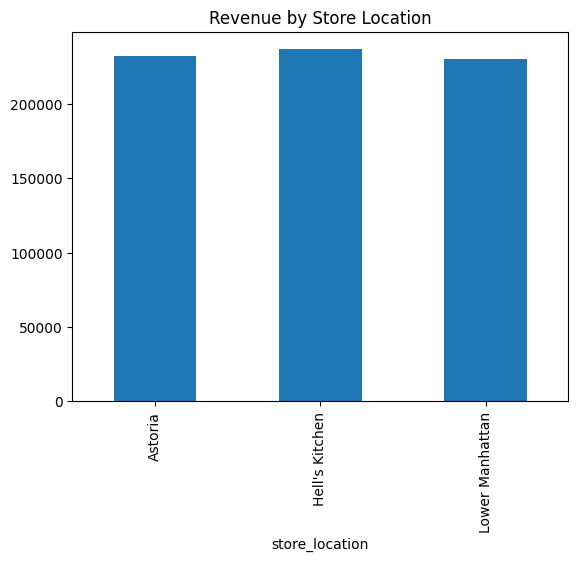

In [24]:
store_rev = df.groupby("store_location")["revenue"].sum()

store_rev.plot(kind="bar")
plt.title("Revenue by Store Location")
plt.show()


# **Popularity vs Revenue**

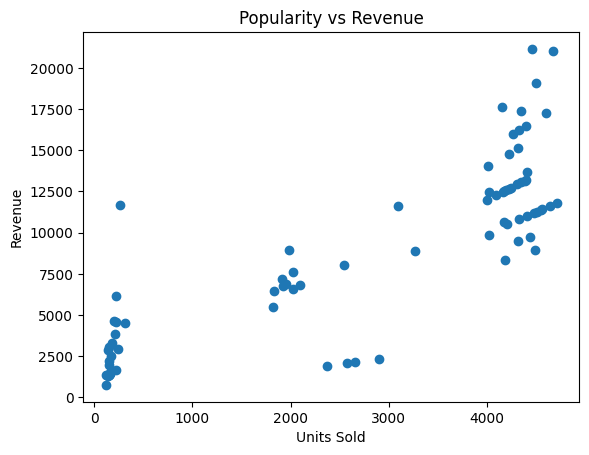

In [25]:
scatter = df.groupby("product_detail").agg({
    "transaction_qty": "sum",
    "revenue": "sum"
})

plt.scatter(scatter["transaction_qty"], scatter["revenue"])
plt.xlabel("Units Sold")
plt.ylabel("Revenue")
plt.title("Popularity vs Revenue")
plt.show()


# **END of EDA**

---

